<a href="https://colab.research.google.com/github/DianaRoor/-/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание
Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.
Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).
Этапы работы:

1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

2.Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

3.Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4.Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

5.Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

6.Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a. Сделайте выводы.
b. Удалите признаки на основании полученных значений, выводов.
c. Повторите п. 3, п. 4 на измененных данных.

7.Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.
Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.

8.Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.





In [33]:
import pandas as pd
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [13]:
pip install scikit-learn

In [15]:
data = fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False, n_retries=3, delay=1.0)
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [23]:
data = fetch_california_housing(as_frame=True)
df = data.frame  # Преобразуем в DataFrame

In [22]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


2.Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [25]:
#Пропусков нет
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


3.Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [27]:
# Определяем признаки и целевую переменную
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [28]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

4.Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [31]:
# Прогнозирование и оценка качества
# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [34]:
# Вычисление метрик
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


In [37]:
train_rmse,test_rmse

(0.7196757085831575, 0.7455813830127764)

In [38]:
train_r2

0.6125511913966952

In [39]:
test_r2

0.5757877060324508

5.Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

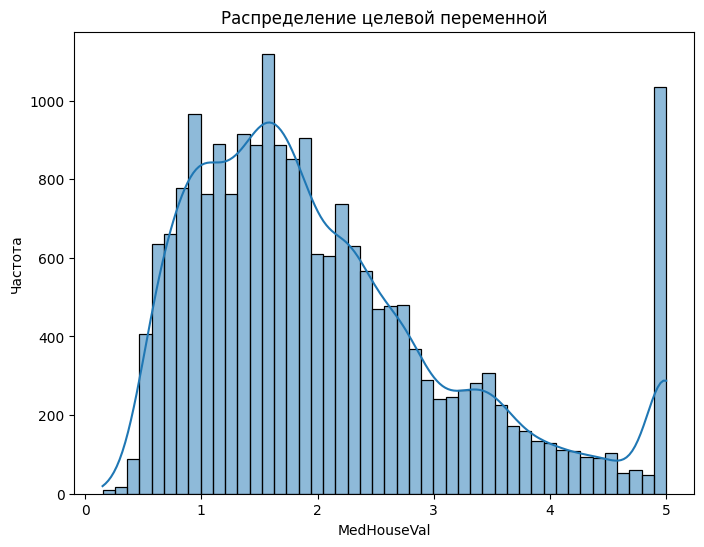

In [53]:
#Целевая переменная имеет похожее на нормальное распределение, но с небольшой асимметрией вправо. Выбросов не наблюдается.
plt.figure(figsize=(8, 6))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Распределение целевой переменной')
plt.xlabel('MedHouseVal')
plt.ylabel('Частота')
plt.show()

6.Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции. a. Сделайте выводы. b. Удалите признаки на основании полученных значений, выводов. c. Повторите п. 3, п. 4 на измененных данных.

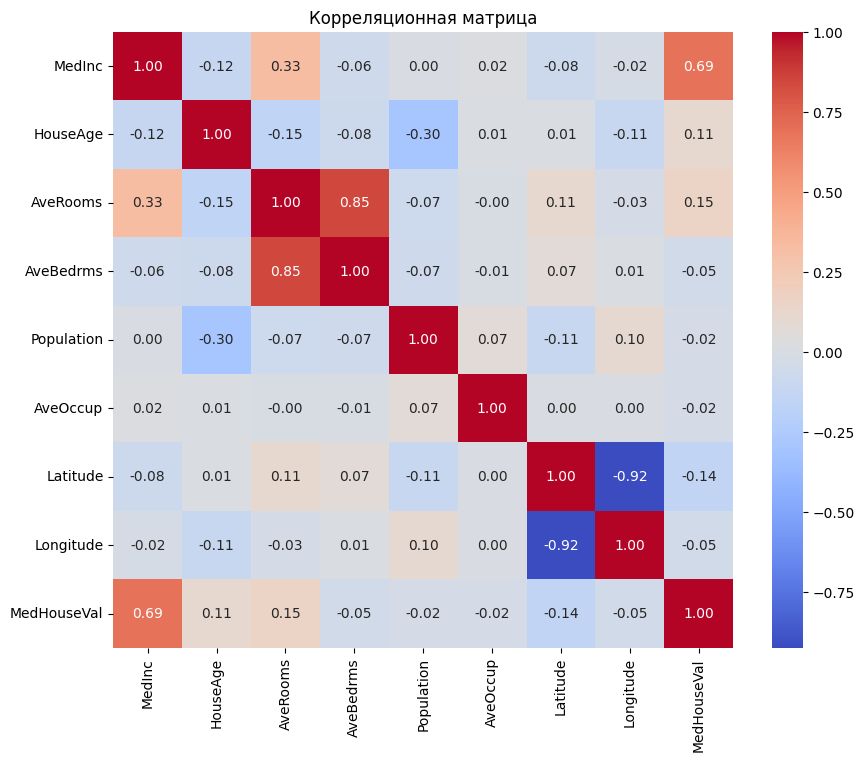

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [55]:
#Несколько признаков имеют высокую положительную корреляцию с целевой переменной: 'MedInc', 'AveRooms', 'AveOccup'.
#Можно удалить признаки 'HouseAge', 'AveBedrms', 'Population', 'AveOccup' due to low correlation or redundancy.
#Удалим признаки и повторим шаги 3 и 4

X = df.drop(['MedHouseVal', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup'], axis=1)

In [56]:
#заново обучаем модель после удаления признаков
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [63]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [64]:
rmse_train

0.7419544744312837

In [65]:
rmse_test

0.7485888241380326

In [66]:
print(f'RMSE Train: {rmse_train:.2f}')
print(f'R2 Train: {r2_train:.2f}')
print(f'RMSE Test: {rmse_test:.2f}')
print(f'R2 Test: {r2_test:.2f}')

RMSE Train: 0.74
R2 Train: 0.59
RMSE Test: 0.75
R2 Test: 0.57


7.Исследуйте оставленные признаки на выбросы. a. Удалите выбросы в случае обнаружения. b. Повторите п. 3, п. 4 на измененных данных. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень. a. Повторите п. 3, п. 4 на измененных данных.

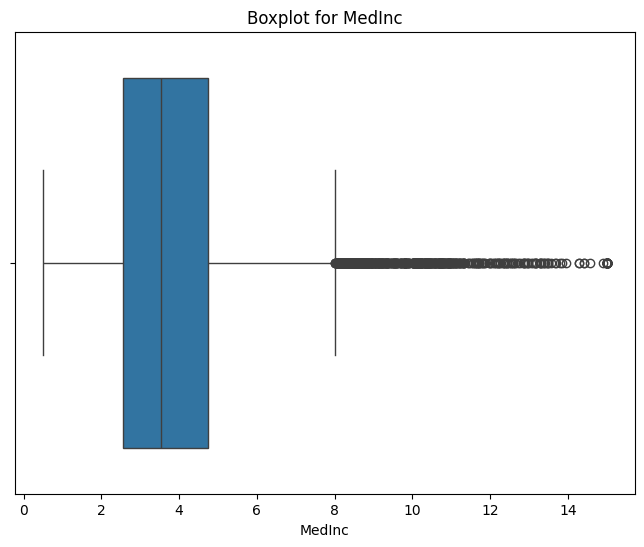

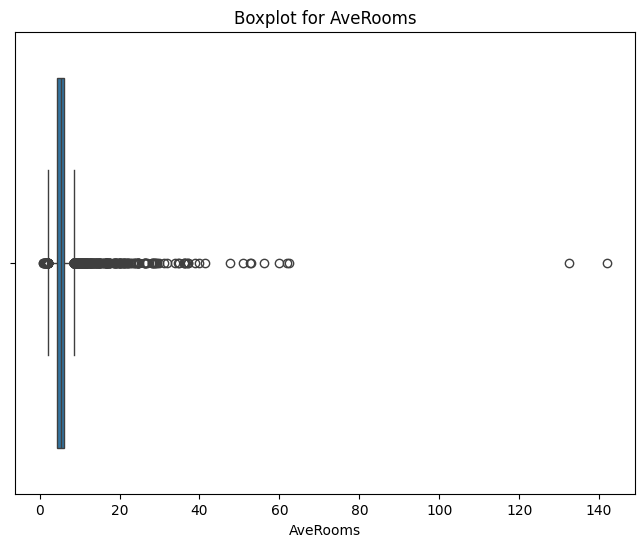

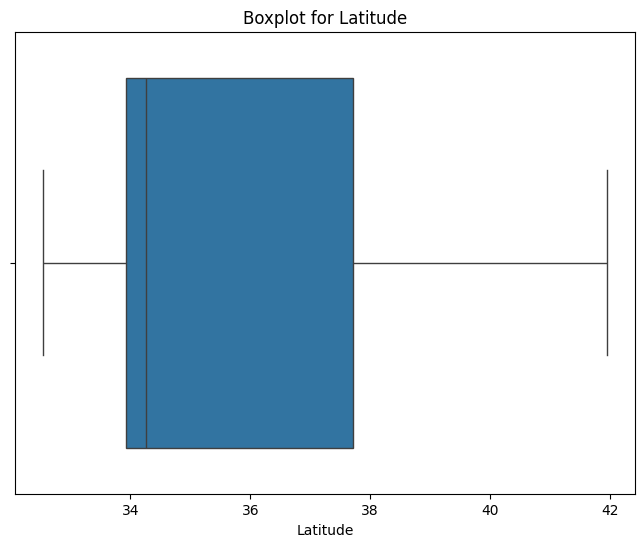

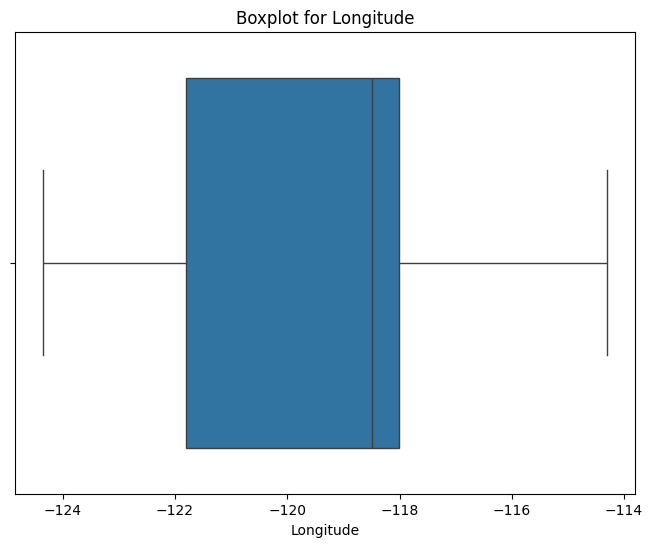

In [67]:
# Построение boxplots для оставшихся признаков
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [68]:
 # Удаление выбросов(В признаке 'MedInc' наблюдаются выбросы.)
 df = df[df['MedInc'] < 6]

In [69]:
# Повторение шагов 3 и 4
X = df.drop(['MedHouseVal', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup'], axis=1)
y = df['MedHouseVal']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [73]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
print(f'RMSE Train: {rmse_train:.2f}')
print(f'R2 Train: {r2_train:.2f}')
print(f'RMSE Test: {rmse_test:.2f}')
print(f'R2 Test: {r2_test:.2f}')

RMSE Train: 0.74
R2 Train: 0.42
RMSE Test: 0.71
R2 Test: 0.45


8. Изменение признаков

In [75]:
# Изменение признака 'AveRooms'
df['AveRooms_log'] = np.log(df['AveRooms'])

<ipython-input-75-a6c468d7467b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AveRooms_log'] = np.log(df['AveRooms'])


In [76]:
X = df.drop(['MedHouseVal', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'AveRooms'], axis=1)
y = df['MedHouseVal']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [80]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [81]:
print(f'RMSE Train: {rmse_train:.2f}')
print(f'R2 Train: {r2_train:.2f}')
print(f'RMSE Test: {rmse_test:.2f}')
print(f'R2 Test: {r2_test:.2f}')

RMSE Train: 0.74
R2 Train: 0.42
RMSE Test: 0.71
R2 Test: 0.45


Выводы:
Удалила признаки с низкой корреляцией

Удалила выбросы

Применила логарифм к признаку "AveRooms"

После обработки данных, модели показали незначительные улучшения метрик.